# Hands on with YOLO
## PyTorch Implementation:

For applications that require YOLO implementations within a PyTorch environment, the Ultralytics organization provides a pre-trained YOLOv5 model readily accessible through the PyTorch Hub: https://pytorch.org/hub/ultralytics_yolov5/. This resource offers a convenient starting point for leveraging YOLOv5 functionalities, enabling developers to harness the power of YOLOv5 within their PyTorch workflows.

# References
- https://docs.ultralytics.com/yolov5/tutorials/train_custom_data/#12-create-labels
- https://docs.ultralytics.com/yolov5/tutorials/pytorch_hub_model_loading/
- https://pytorch.org/hub/ultralytics_yolov5/

# Inference

In [1]:
from ultralytics import YOLO
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True, force_reload=True)

# Images
imgs = ['https://ultralytics.com/images/zidane.jpg', 'https://ultralytics.com/images/bus.jpg']  # batch of images

# Inference
results = model(imgs, size=640)

# Results
results.print()
results.save()  # or .show()

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/howt/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-4-28 Python-3.10.14 torch-2.2.2+cu118 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
image 1/2: 720x1280 2 persons, 2 ties
image 2/2: 1080x810 4 persons, 1 bus
Speed: 1377.7ms pre-process, 41.5ms inference, 62.6ms NMS per image at shape (2, 3, 640, 640)
Saved 2 images to runs/detect/exp6


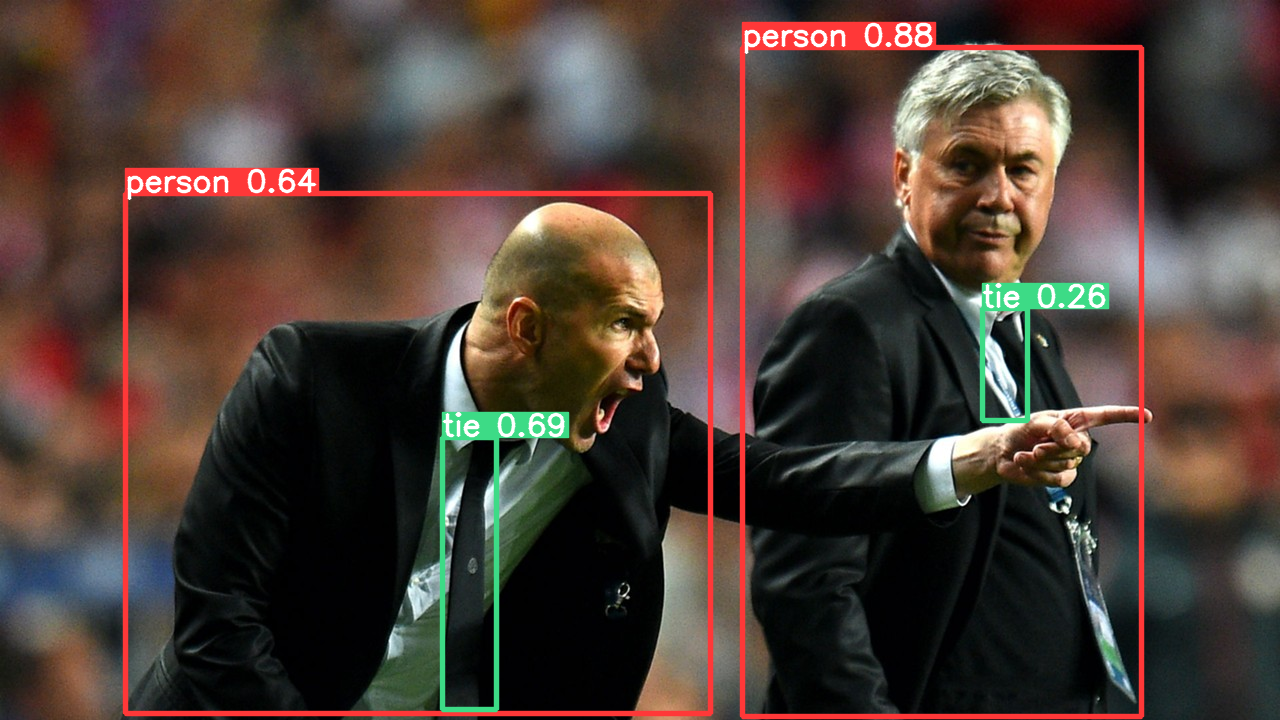

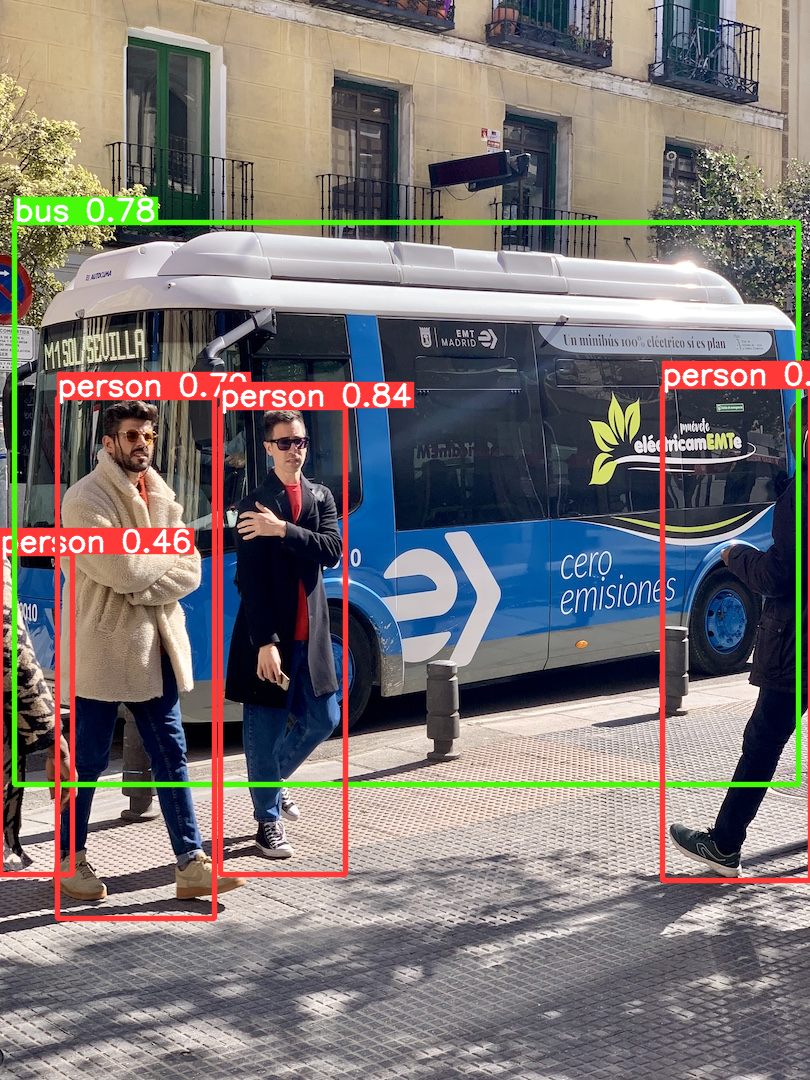

In [2]:
results.show()

In [3]:
# results in pandas
for idx, i in enumerate(imgs):
    print(results.pandas().xyxy[idx])

         xmin        ymin         xmax        ymax  confidence  class    name
0  742.912354   47.957733  1141.111450  716.870605    0.880895      0  person
1  442.041412  437.330505   496.723419  709.916321    0.687274     27     tie
2  125.185669  193.621460   710.883789  713.071045    0.641651      0  person
3  982.890991  308.404907  1027.331909  420.225098    0.263235     27     tie
         xmin        ymin        xmax        ymax  confidence  class    name
0  220.872498  407.454895  345.726654  874.648315    0.835051      0  person
1  662.572327  386.168488  810.000000  880.370300    0.828785      0  person
2   57.580273  397.373199  214.761307  918.182617    0.785027      0  person
3   14.685056  222.140381  798.404846  784.968079    0.781423      5     bus
4    0.000000  553.391846   72.455048  874.681519    0.464575      0  person


# Inference Settings
Inference Settings
YOLOv5 models offer a range of inference attributes that can be adjusted to optimize object detection performance. These attributes include:
- Confidence Threshold: The minimum confidence level required for a detection to be considered valid
- IoU Threshold: The minimum intersection over union (IoU) required for a detection to be considered a true positive
- Other attributes: Additional settings that can be adjusted to fine-tune inference performance

These attributes can be feed into the model function during setup:

In [4]:
model.conf = 0.25  # NMS confidence threshold
iou = 0.45  # NMS IoU threshold
agnostic = False  # NMS class-agnostic
multi_label = False  # NMS multiple labels per box
classes = None  # (optional list) filter by class, i.e. = [0, 15, 16] for COCO persons, cats and dogs
max_det = 1000  # maximum number of detections per image
amp = False  # Automatic Mixed Precision (AMP) inference

# these can be feed into the model by simply feeding it into the model setup
results = model(imgs, size=320)  # custom inference size

# Via Ultralytics Packages
The Ultralytics packages offer an alternative approach to utilizing YOLOv5, with a slightly different syntax and results output format compared to the PyTorch Hub versions. While the overall functionality remains similar, the Ultralytics packages provide a distinct implementation that can be leveraged for specific use cases that could offer more flexibility.

In [5]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.pt')  # load an official model
# load a custom model
# model = YOLO('path/to/best.pt') 

# Predict with the model
results = model('https://ultralytics.com/images/bus.jpg')

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    result.save(filename='result.jpg') 
    # result.show()  # display to screen
    
import matplotlib.pyplot as plt
from PIL import Image
plt.imshow(Image.open('result.jpg'))

100%|██████████| 6.23M/6.23M [00:01<00:00, 4.77MB/s]



Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /home/howt/work/til-24-curriculum/cv_vlm/Unit_2/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 126.8ms
Speed: 3.2ms preprocess, 126.8ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 480)


# Notes
There is also good information on the training on custom data on ultralytics page: 
- https://docs.ultralytics.com/yolov5/tutorials/train_custom_data.

Datasets for detection/segmentation etc
- https://docs.ultralytics.com/datasets/detect/argoverse/